In [1]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from pathlib import Path
import pandas as pd

In [2]:
PROCESSED_DATA_DIR = Path("data/processing_checkpoint")
checkpoint_file_path = PROCESSED_DATA_DIR / "03_10_day_window_sliced.parquet"

In [3]:
df_final = pd.read_parquet(checkpoint_file_path)

In [ ]:
# final_numerical_features = [
#     "count_about", "count_total_sessions", "count_downgrade", "count_error",
#     "thumbs_ratio", "ads_per_session", "frequency", "avg_songs_session", 
#     "errors_per_session", "user_lifecycle_h", "count_roll_advert", "count_upgrade",
#     "session_length_variance", "active_days_ratio", "hours_since_last_session",
#     "unique_songs_ratio", "hours_since_downgrade", "is_new_user",
#     "within_window_activity_ratio", "song_listening_change",
#     "recent_activity_ratio", "session_depth_change"                                                                       
# ]

final_numerical_features=[
'num_unique_artists', 'count_about', 'count_add_friend', 'count_add_to_playlist',
'count_downgrade', 'count_error', 'count_help', 'count_home', 'count_logout', 'count_nextsong',
'count_roll_advert', 'count_save_settings', 'count_settings', 'count_submit_downgrade', 'count_submit_upgrade', 
'count_thumbs_down', 'count_thumbs_up', 'count_upgrade', 'count_total_sessions', 'user_lifecycle_h',
'ttl_length', 'item_per_session', 'frequency', 'avg_songs_session', 'thumbs_ratio', 'errors_per_session', 
'ads_per_session', 'hours_since_last_session', 'active_days', 'active_days_ratio', 'session_length_variance', 
'is_new_user', 'hours_since_downgrade', 'unique_songs_ratio', 
'within_window_activity_change', 'song_listening_change', 'recent_activity_ratio', 'session_depth_change']

final_categorical_features = ["last_level"]

all_features = final_numerical_features + final_categorical_features

In [5]:
X = df_final[all_features]
y = df_final["label"]

In [6]:
df_numerical_subset = X[final_numerical_features]

correlation_matrix = df_numerical_subset.corr()

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

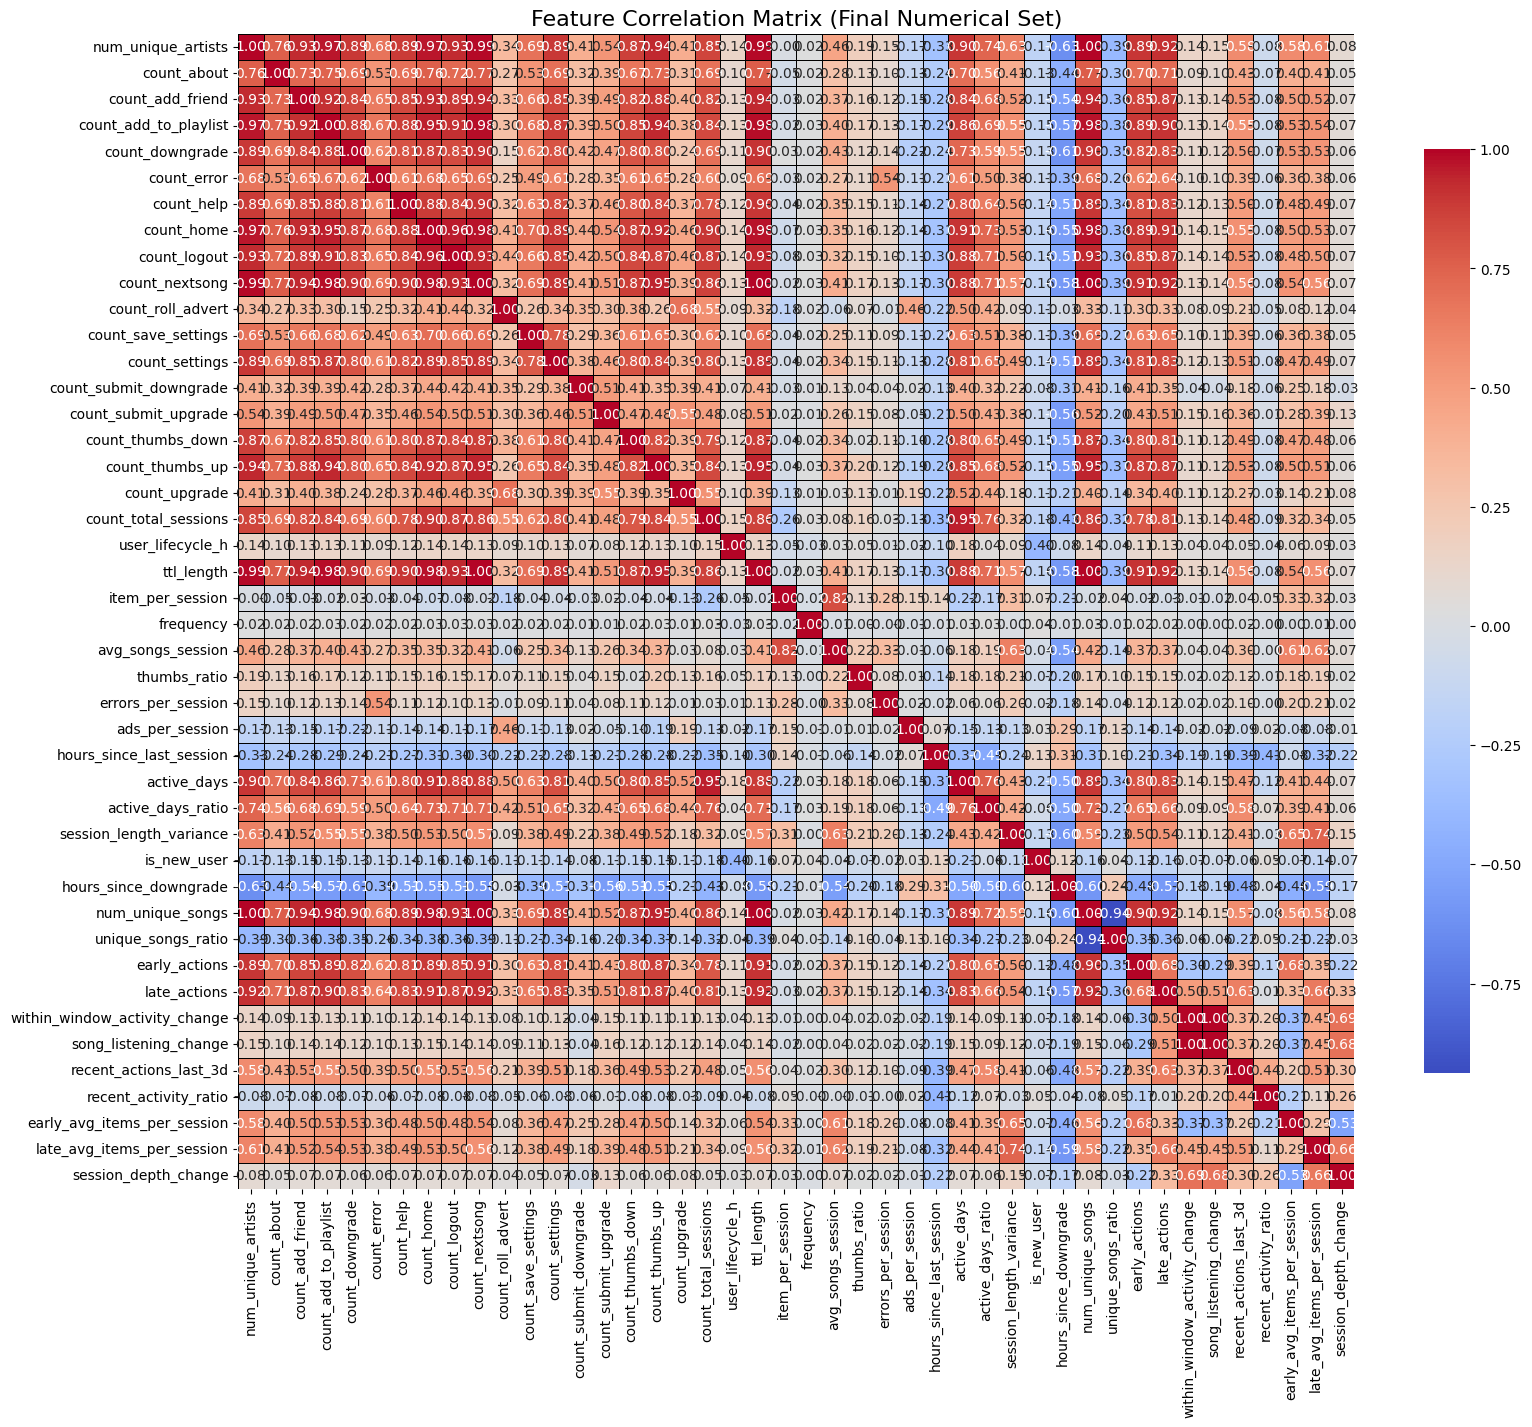

In [8]:
plt.figure(figsize=(18, 15))

# Create the heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,         # Show the correlation numbers on the map
    cmap='coolwarm',    # Color map: cool=negative, warm=positive
    fmt=".2f",          # Format the numbers to two decimal places
    linewidths=0.5,     # Add lines between cells for clarity
    linecolor='black',
    cbar_kws={'shrink': 0.8} # Shrink color bar slightly
)

plt.title('Feature Correlation Matrix (Final Numerical Set)', fontsize=16)
plt.show()

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import TimeSeriesSplit, cross_validate
from sklearn.metrics import f1_score, roc_auc_score, make_scorer
from sklearn.ensemble import HistGradientBoostingClassifier

In [10]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", drop='first'), final_categorical_features),
        ("num", StandardScaler(), final_numerical_features)
    ],
    remainder="passthrough"
)

In [11]:
lr_model = LogisticRegression(solver="liblinear", penalty="l1", C=0.05)

In [12]:
gbdt_pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
    ('smote', SMOTE(random_state=42)),
    ("classifier", lr_model)
])

In [13]:
tscv = TimeSeriesSplit(n_splits=5)
scoring = {'F1': make_scorer(f1_score), 'AUC': make_scorer(roc_auc_score)}

In [14]:
gbdt_scores = cross_validate(
    gbdt_pipeline, 
    X, 
    y, 
    scoring=scoring, 
    cv=tscv, 
    n_jobs=-1
)

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/benedikt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/benedikt/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/benedikt/anaconda3/lib/python3.11/site-packages/imblearn/pipeline.py", line 518, in fit
    Xt, yt = self._fit(X, y, routed_params, raw_params=params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/benedikt/anaconda3/lib/python3.11/site-packages/imblearn/pipeline.py", line 440, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
                               ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/benedikt/anaconda3/lib/python3.11/site-packages/joblib/memory.py", line 326, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/benedikt/anaconda3/lib/python3.11/site-packages/imblearn/pipeline.py", line 1336, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **params.get("fit_resample", {}))
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/benedikt/anaconda3/lib/python3.11/site-packages/imblearn/base.py", line 202, in fit_resample
    return super().fit_resample(X, y, **params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/benedikt/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/benedikt/anaconda3/lib/python3.11/site-packages/imblearn/base.py", line 99, in fit_resample
    X, y, binarize_y = self._check_X_y(X, y)
                       ^^^^^^^^^^^^^^^^^^^^^
  File "/Users/benedikt/anaconda3/lib/python3.11/site-packages/imblearn/base.py", line 157, in _check_X_y
    X, y = validate_data(self, X=X, y=y, reset=True, accept_sparse=accept_sparse)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/benedikt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 2971, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/benedikt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 1368, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/Users/benedikt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 1105, in check_array
    _assert_all_finite(
  File "/Users/benedikt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 120, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "/Users/benedikt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 169, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
SMOTE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


In [ ]:
print(f"GBDT Mean F1 Score (Validation): {gbdt_scores['test_F1'].mean():.4f}")
print(f"GBDT Mean AUC Score (Validation): {gbdt_scores['test_AUC'].mean():.4f}")

GBDT Mean F1 Score (Validation): 0.1715
GBDT Mean AUC Score (Validation): 0.6582


In [ ]:
# print("=== DIAGNOSTIC REPORT ===")
# print(f"Dataset shape: {df_final.shape}")
# print(f"Feature matrix shape: {X.shape}")
# print(f"Churn rate: {y.mean():.2%}")
# print(f"Missing values: {X.isnull().sum().sum()}")
# print(f"Constant features: {(X.nunique() == 1).sum()}")
# print(f"\nSnapshot days: {sorted(df_final['snapshot_day'].unique())}")
# print(f"Users per snapshot: {df_final.groupby('snapshot_day')['userId'].nunique().to_dict()}")

In [ ]:
# tscv = TimeSeriesSplit(n_splits=5)

# for fold, (train_idx, val_idx) in enumerate(tscv.split(X)):
#     print(f"\nFold {fold + 1}:")
#     print(f"  Train: {len(train_idx)} samples, Churn rate: {y.iloc[train_idx].mean():.2%}")
#     print(f"  Val: {len(val_idx)} samples, Churn rate: {y.iloc[val_idx].mean():.2%}")
    
#     # Check if validation set has ANY churners
#     if y.iloc[val_idx].sum() == 0:
#         print("  ⚠️ WARNING: No churners in validation set!")

In [ ]:
# # 1. Check TimeSeriesSplit behavior
# print("=== TIME SERIES SPLIT ANALYSIS ===")
# tscv = TimeSeriesSplit(n_splits=5)

# for fold, (train_idx, val_idx) in enumerate(tscv.split(X)):
#     print(f"\nFold {fold + 1}:")
#     print(f"  Train size: {len(train_idx)}, Churn rate: {y.iloc[train_idx].mean():.2%}")
#     print(f"  Val size: {len(val_idx)}, Churn rate: {y.iloc[val_idx].mean():.2%}")
#     print(f"  Val churners: {y.iloc[val_idx].sum()}")
    
#     # Check snapshot day distribution in train/val
#     train_days = df_final.iloc[train_idx]['snapshot_day'].value_counts().sort_index()
#     val_days = df_final.iloc[val_idx]['snapshot_day'].value_counts().sort_index()
#     print(f"  Train snapshot days: {train_days.to_dict()}")
#     print(f"  Val snapshot days: {val_days.to_dict()}")

# # 2. Check individual feature predictive power
# print("\n=== FEATURE PREDICTIVE POWER ===")
# from sklearn.metrics import roc_auc_score

# feature_aucs = {}
# for col in final_numerical_features:
#     if X[col].nunique() > 1:
#         try:
#             # Handle NaN and inf
#             valid_mask = np.isfinite(X[col])
#             if valid_mask.sum() > 0:
#                 auc = roc_auc_score(y[valid_mask], X[col][valid_mask])
#                 # Flip if < 0.5 (negative correlation is still predictive)
#                 auc = max(auc, 1 - auc)
#                 feature_aucs[col] = auc
#         except Exception as e:
#             print(f"{col}: Error - {e}")

# # Sort by predictive power
# feature_aucs_sorted = sorted(feature_aucs.items(), key=lambda x: x[1], reverse=True)
# print("\nTop 10 most predictive features:")
# for feat, auc in feature_aucs_sorted[:10]:
#     print(f"  {feat}: {auc:.4f}")

# print("\nBottom 5 least predictive features:")
# for feat, auc in feature_aucs_sorted[-5:]:
#     print(f"  {feat}: {auc:.4f}")

# # 3. Check if there's overlap in users between train/val
# print("\n=== USER OVERLAP CHECK ===")
# for fold, (train_idx, val_idx) in enumerate(tscv.split(X)):
#     train_users = set(df_final.iloc[train_idx]['userId'])
#     val_users = set(df_final.iloc[val_idx]['userId'])
#     overlap = len(train_users & val_users)
#     print(f"Fold {fold + 1}: {overlap} users appear in both train and val (out of {len(val_users)} val users)")
#     if overlap > 0:
#         print(f"  ⚠️ WARNING: {overlap/len(val_users):.1%} of validation users also in training!")

# # 4. Check label distribution across snapshot days
# print("\n=== LABEL DISTRIBUTION BY SNAPSHOT DAY ===")
# print(df_final.groupby('snapshot_day')['label'].agg(['count', 'sum', lambda x: f"{x.mean():.2%}"]))